# Intro

Ok. As we're warming up to the project, today's exercises is going to ask you to create our own micro-project. It'll be highly structured and hosted on the web-page you created last time. Before we can start on that there's a bit of reading first. 

Thus, today's lecture has two parts:

* More reading on Narrative Data Visualization.
* Creating a micro project based on our work in the class so far.

So let's get started 😀

## Part 1: More on narrative data viz

*Reading*. More on Narrative Visualization. Edward Segel and Jeffrey Heer. [Narrative Visualization: Telling Stories with Data](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf), section 4-6.

> *Exercise*: Questions to the text
> 
> * What's the point of Figure 7? **The point of Figure 7 is to outline and point out what the design space of narrative visualization looks like and trends, both good and bad, that occured during the analysis of these 58 different cases.**
> * Use Figure 7 to find the most common design choice within each category for the Visual narrative and Narrative structure (the categories within visual narrative are 'visual structuring', 'highlighting', etc). **Most common design choice for visual structuring is to have a _Consistent Visual Platform_. For highlighting it is _feature distinction_. Lastly for transition guide it is _animated transition_.**
> * Check out Figure 8 and section 4.3. What is your favorite genre of narrative visualization? Why? What is your least favorite genre? Why? **Favorite is the _Slide Show_ because it allows me to go visualize a smaller segment at a time but it still tells the whole story after going through the slides. Least favorite is the _Partisioned Poster_ because it just feels too clustered.**

## Part 2: A short data story / micro-project

> *Exercise*: Create a short data-story based on the work we've done in class so far. (This exercise is a kind of "micro version" of what we'll be doing in the final project). Follow the directions in the bulleted list below when you create your data-story.

* **Find your own story to tell in the work on analyzing the SF Crime Data that we've done so far** (Week 1 - Week 6). The idea is to choose an insight about crime in SF (perhaps how something changed over the years) and communicate that insight to a general audience reader.
* The web-page should be hosted on your GitHub Pages site (Week 7).
* The format must be the classic *Magazine Genre* presented on a single web-page (see the Segel \& Heer paper for details).
* The story should have a brief introduction to the dataset so new readers from outside the class can understand what's going on.
* Your story should include three visualizations. Not more than three, not less than three (but multi-panel figures are OK). The figures should be one of each of the following types
  - One time-series / bar chart (it's OK to use the "fancy" plot-typs like calendar plots or polar bar-charts from Week 2, Part 4).
  - One map (use techniques from Week 3 and 4)
  - One interactive visualization in Bokeh (Week 6)
* **At a minimum, the Bokeh visualization should contain different data** than the exercise we did for Week 6 (it's a plus if it's a new type of viz altogether). 
* The two other visualization may be repetitions of figures created during the previous lectures, or they may be new.
* Make the figures nice. Specifically:
  - Aim to make the figures visually consistent (color, fonts, etc)
  - Follow the recommendations from my video on nice figures (Week 2, part 3)
* In terms of the amount of text, I envision something like 500-1500 words (including figure captions). <font color="gray">Try to write in your own words - the LLMs have a tendency to write a lot of text and not be so precise. So if the writing is all elegantly written but empty prose, we will be critical. It is OK, however, to have the LLM help you get the grammer, etc. right.</font>
* It is a plus if you can back up some of your findings with external sources, such as news stories from the area, looking up which building is located at some set of `lat,lon` coordinates, or similar. (So when you see something happening at some time/place in the data, see if you can understand it more deeply by investigating outside the dataset.) Use real references at the end of the text to organize your links to the outside world.

## The story
The trend I noticed and want to work with is...

Trends discovered:
* DRUG/NARCOTIC downward trend! Can be shown with a time series or a bar chart (which one should we choose?)


### Pre-processing, importing packages and setting the style of the plots

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

import folium

# Reading in the crime data
data_full = pd.read_csv("../data/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")

In [6]:
data_full['Date'] = pd.to_datetime(data_full['Date']) # Converting 'Date' to datetime
data_full['Year'] = data_full['Date'].dt.year # Creating a seperate year column
data_full['Month'] = data_full['Date'].dt.strftime('%b') # and a seperate month column (string)
data_full['Hour'] = [int(x[:2]) for x in data_full['Time']] # and a seperate hour column (string)

data = data_full.query("Date <= '2017-12-31'") # Filter out records from 2018
focuscrimes = sorted(list(set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])))

data_full = data_full.loc[data_full['Category'].isin(focuscrimes)]
data = data.loc[data['Category'].isin(focuscrimes)]

In [23]:
# Set custom rcParams for a simple style
plt.rcParams.update({
    'axes.prop_cycle': plt.cycler(color=['#4CAF50']),
    'axes.facecolor': '#F5F5F5',
    'figure.facecolor': '#FFFFFF',
    'grid.color': '#DDDDDD',
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
    'xtick.major.pad': 6,
    'ytick.major.pad': 6,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'sans-serif'],
})

plt.rcParams['axes.titley'] = 1.02 #1.01
plt.rcParams['axes.titlepad'] = 0 # -14

# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [10, 6]

### Time series/bar chart
Bar chart shows the downward trend as well as the time series...which one is better? Or more fun?

**Note on the choice of having a window size of 365 days in the rolling average:**
Using a 365-day window is particularly meaningful for daily data as it represents a full year. This can help in capturing seasonal trends and variations that occur on a yearly basis, providing insights into how the average number of incidents changes over time, smoothed across an entire year.

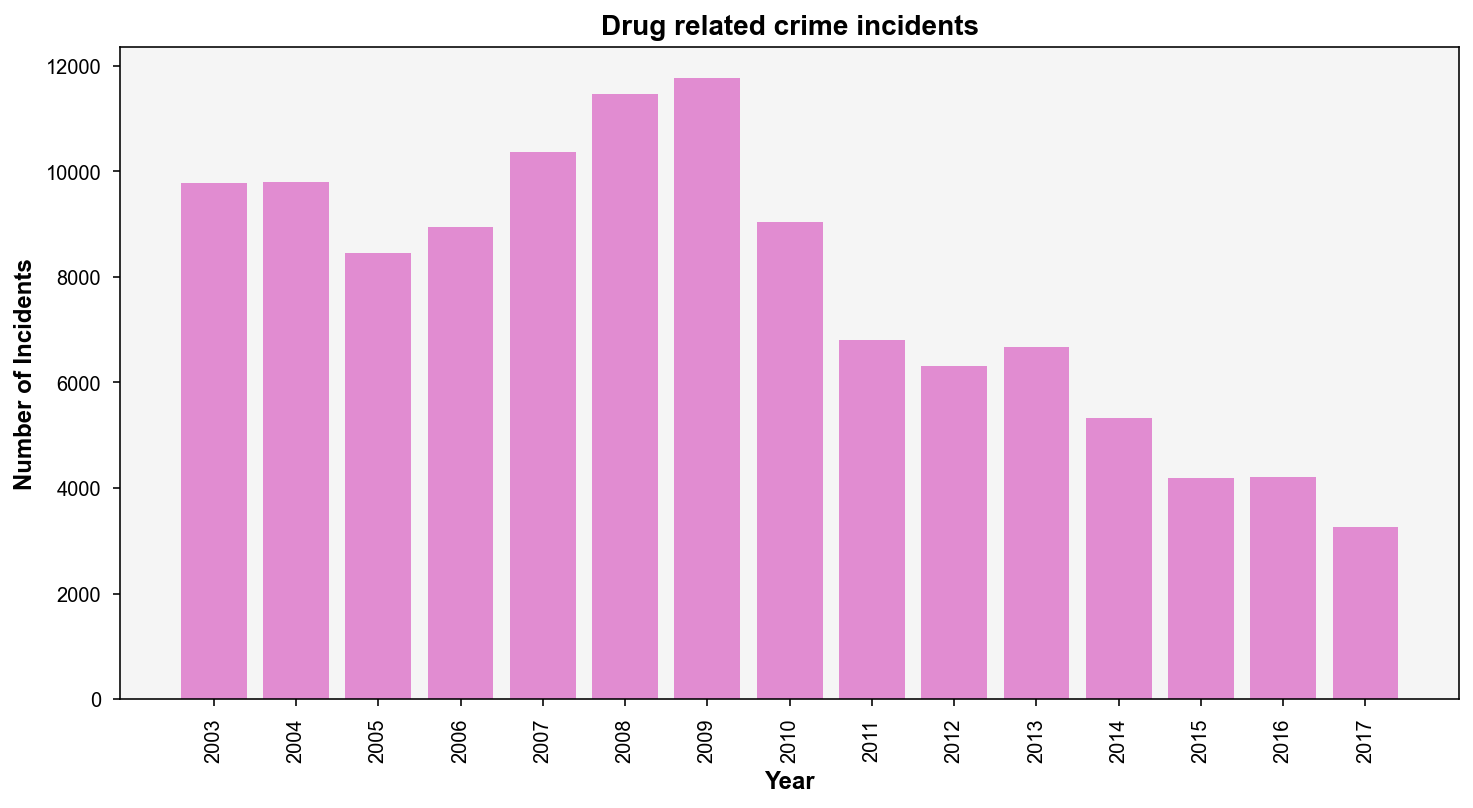

In [29]:
drug = data[data.Category == 'DRUG/NARCOTIC']

drug_count_per_year = drug.groupby('Year').size().reset_index(name = 'Count')

# Plot the drug crime incidents
plt.figure(figsize=(12, 6))
plt.bar(drug_count_per_year['Year'], drug_count_per_year['Count'], color='#E18CD1')
plt.xticks(drug_count_per_year['Year'], rotation=90)  # Ensures there's an x-tick for each year

plt.title('Drug related crime incidents')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()


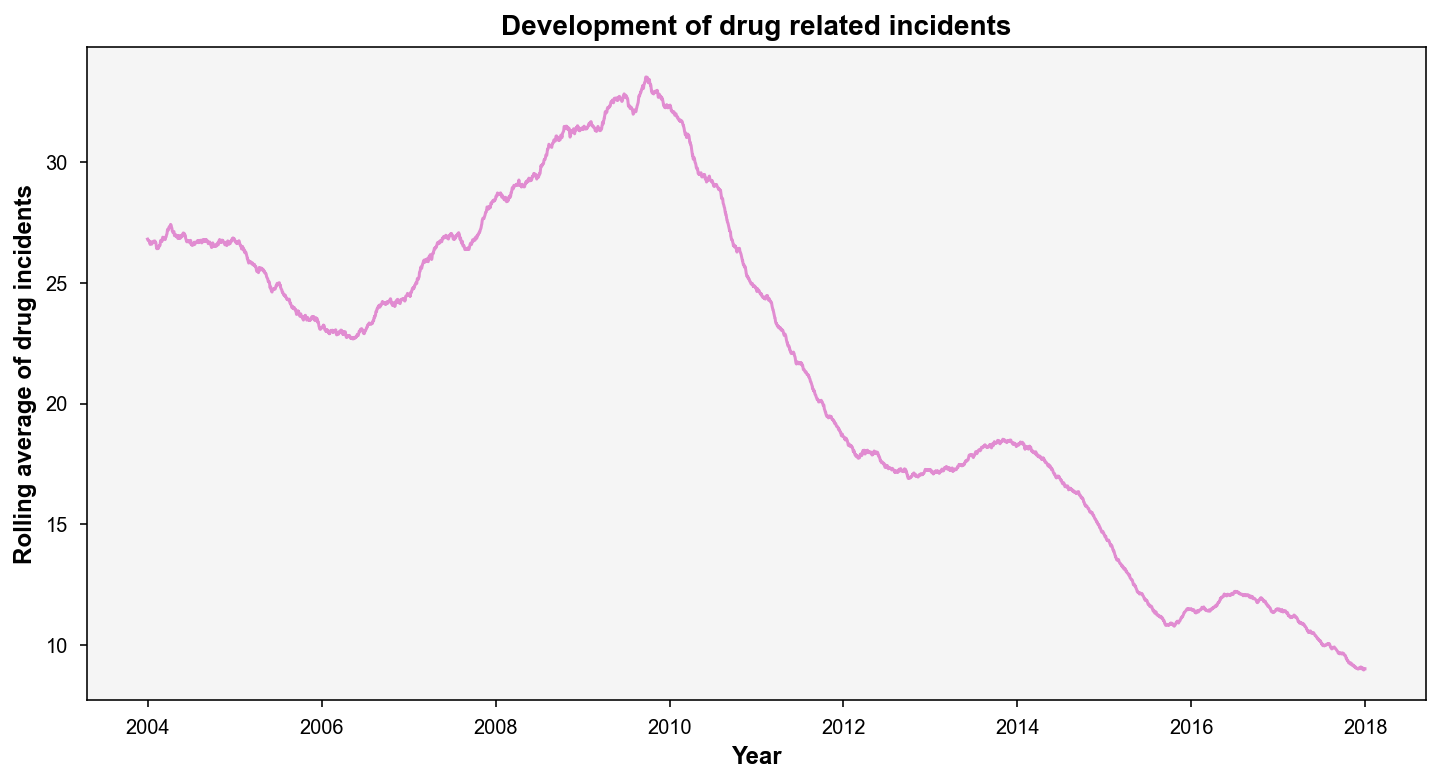

In [68]:
drug_count_per_day = drug.groupby('Date').size().reset_index(name = 'Count')
drug_count_per_day = drug_count_per_day.set_index('Date')

smoothed_drug_count_per_day = drug_count_per_day.rolling(365).mean()

plt.figure(figsize=(12, 6))
plt.plot(smoothed_drug_count_per_day['Count'], color='#E18CD1')
plt.title('Development of drug related incidents')
plt.xlabel('Year')
plt.ylabel('Rolling average of drug incidents')
plt.show()
